[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


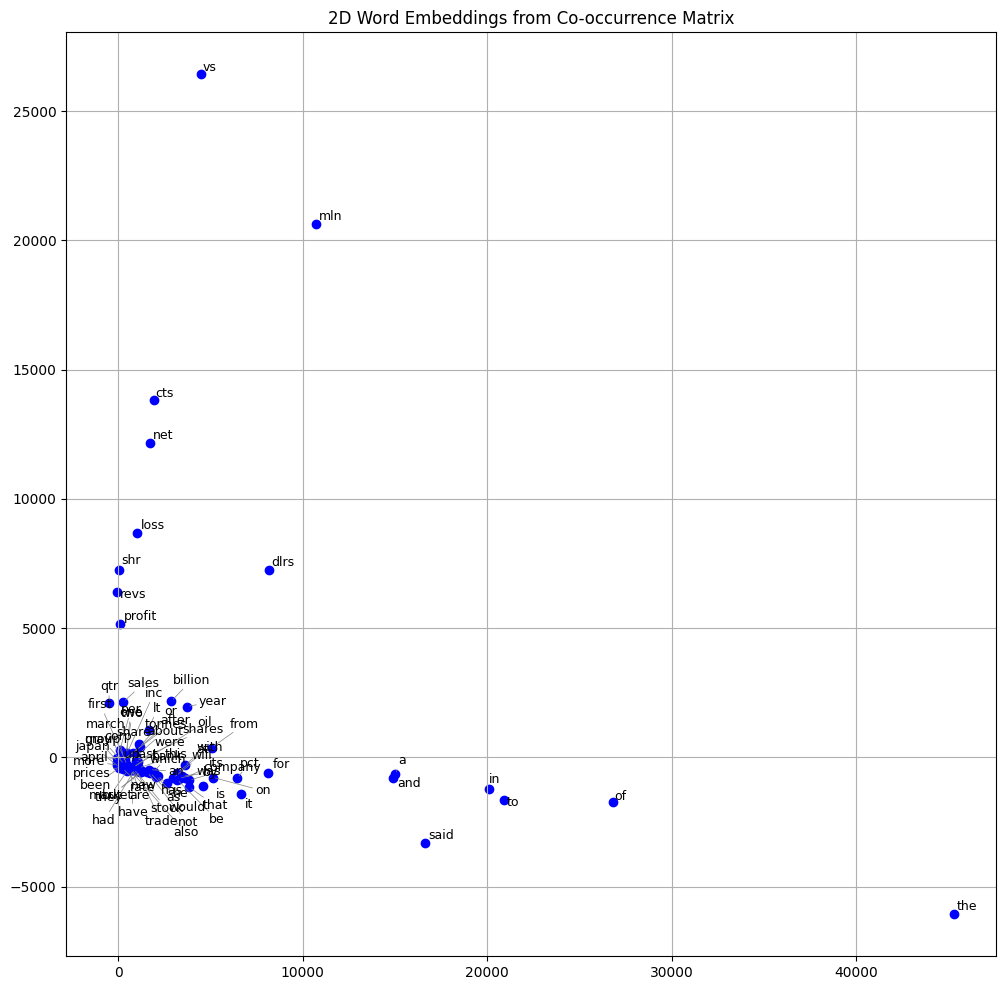

In [6]:
%matplotlib inline

import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter

nltk.download("reuters")
nltk.download("punkt")
nltk.download("punkt_tab")

from nltk.corpus import reuters

def get_distinct_words(corpus):
    words = []
    for fileid in corpus.fileids():
        words.extend(nltk.word_tokenize(corpus.raw(fileid).lower()))
    words = [w for w in words if w.isalpha()]
    vocab = list(set(words))
    return vocab, words

def build_cooccurrence_matrix(words, vocab, window_size=4):
    vocab_to_index = {word: i for i, word in enumerate(vocab)}
    matrix = np.zeros((len(vocab), len(vocab)), dtype=np.int32)
    for index, word in enumerate(words):
        if word not in vocab_to_index:
            continue
        word_idx = vocab_to_index[word]
        start = max(index - window_size, 0)
        end = min(index + window_size + 1, len(words))
        for i in range(start, end):
            if i == index:
                continue
            context_word = words[i]
            if context_word in vocab_to_index:
                context_idx = vocab_to_index[context_word]
                matrix[word_idx, context_idx] += 1
    return matrix, vocab_to_index

def reduce_dimensions(matrix, k=2):
    pca = PCA(n_components=k)
    reduced = pca.fit_transform(matrix)
    return reduced

from adjustText import adjust_text

def plot_embeddings(embeddings, vocab, words_to_plot=30):
    plt.figure(figsize=(12, 12))
    texts = []
    for i, word in enumerate(vocab[:words_to_plot]):
        x, y = embeddings[i, 0], embeddings[i, 1]
        plt.scatter(x, y, c="blue")

        texts.append(plt.text(x + 5, y + 5, word, fontsize=9))

    adjust_text(
        texts,
        expand=(1.2, 1.4),
        arrowprops=dict(arrowstyle="-", color="gray", lw=0.5)
    )
    plt.title("2D Word Embeddings from Co-occurrence Matrix")
    plt.grid()
    plt.show()


vocab, words = get_distinct_words(reuters)
word_freq = Counter(words)
vocab = [w for w, _ in word_freq.most_common(500)]
co_matrix, vocab_to_index = build_cooccurrence_matrix(words, vocab, window_size=4)
reduced_embeddings = reduce_dimensions(co_matrix, k=2)
plot_embeddings(reduced_embeddings, vocab, words_to_plot=80)


In [2]:
!pip install adjustText